# Text Classification on Movie Reviews

## Import neccessary libraries

In [85]:
import nltk
from nltk import FreqDist
from nltk import classify
from sklearn.svm import SVC
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import movie_reviews
from nltk import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load and prepare the dataset

In [86]:
nltk.download('movie_reviews')
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\boddu\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


### To ensure that the data is randomly distributed across the training and testing sets to avoid bias

In [87]:
# Shuffle the documents
import random
random.shuffle(documents)

## Preprocessing

### Text cleaning

In [88]:
# Remove stopwords and perform stemming
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()

def clean_text(words):
    return [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]

In [89]:
# # Text cleaning with lemmatization
# # Download WordNet resource for lemmatization
# nltk.download('wordnet')

# lemmatizer = WordNetLemmatizer()

In [90]:
# def clean_text(words):
#     return [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]

# documents = [(clean_text(words), category) for words, category in documents]

### Feature extraction

In [91]:
all_words = [word for words, category in documents for word in words]
word_features = FreqDist(all_words).keys()

In [92]:
def extract_features(document):
    document_words = set(document)
    features = {word: (word in document_words) for word in word_features}
    return features

## Train test split

In [93]:
train_set, test_set = train_test_split(documents, test_size=0.2, random_state=42)

## Model Training

### Naive Bayes Classifier

In [94]:
training_data = [(extract_features(words), category) for words, category in train_set]
testing_data = [(extract_features(words), category) for words, category in test_set]

classifier = NaiveBayesClassifier.train(training_data)

In [95]:
y_true = [category for words, category in test_set]
y_pred = [classifier.classify(extract_features(words)) for words, category in test_set]

print("Accuracy:", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

Accuracy: 0.825

Confusion Matrix:
 [[193  22]
 [ 48 137]]

Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.90      0.85       215
         pos       0.86      0.74      0.80       185

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



### Support Vector Machine (SVM)

In [96]:
# Prepare data
X_train = [' '.join(words) for words, _ in train_set]
y_train = [category for _, category in train_set]
X_test = [' '.join(words) for words, _ in test_set]
y_test = [category for _, category in test_set]

# Create SVM model
svm_model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))
svm_model.fit(X_train, y_train)

# Evaluate
svm_predictions = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_predictions))

SVM Accuracy: 0.86

SVM Classification Report:
               precision    recall  f1-score   support

         neg       0.87      0.87      0.87       215
         pos       0.85      0.84      0.85       185

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



### Random Forest 

In [97]:
# Create Random Forest model
rf_model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)

# Evaluate
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.795

Random Forest Classification Report:
               precision    recall  f1-score   support

         neg       0.80      0.83      0.81       215
         pos       0.79      0.76      0.77       185

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.80      0.79       400



## Visualization

### Model Performance Visualizations

The code below includes visualizations of confusion matrices for three different models: Naive Bayes, Support Vector Machine (SVM), and Random Forest. These matrices offer a clear overview of each model's performance, detailing true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

**Interpretation for Naive Bayes:**
- **True Positive (TP):** Positive reviews correctly classified.
- **True Negative (TN):** Negative reviews correctly classified.
- **False Positive (FP):** Negative reviews misclassified as positive.
- **False Negative (FN):** Positive reviews misclassified as negative.

**Interpretation for Support Vector Machine (SVM) and Random Forest:**
- Similar interpretations as Naive Bayes.

**Understanding the Visualizations:**
- Darker shades in the diagonal indicate higher numbers of correct predictions (TP and TN).
- Off-diagonal elements represent misclassifications (FP and FN).
- Color intensity provides a visual representation of the number of instances.

The visualizations aid in assessing the strengths and weaknesses of each model, facilitating a comparative analysis of their performance.

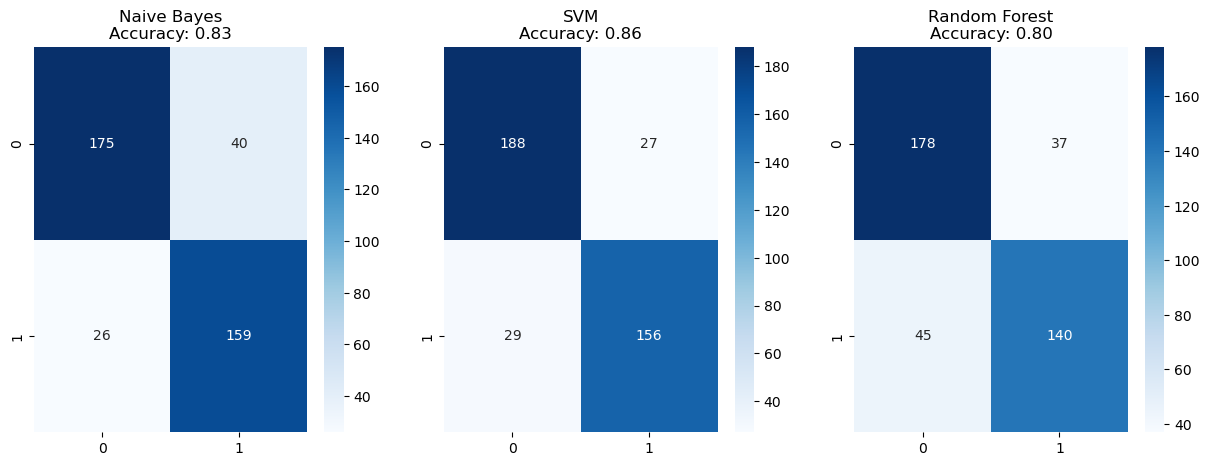

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have X_train, X_test, y_train, y_test from the preprocessing step

# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Train Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
nb_predictions = nb_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)
rf_predictions = rf_model.predict(X_test_tfidf)

# Compare models using accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Visualize confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Naive Bayes\nAccuracy: {nb_accuracy:.2f}')

sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'SVM\nAccuracy: {svm_accuracy:.2f}')

sns.heatmap(confusion_matrix(y_test, rf_predictions), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title(f'Random Forest\nAccuracy: {rf_accuracy:.2f}')

plt.show()

## Conclusion : 

**Support Vector Machine (SVM) for Text Classification:**

**Strengths:**
1. SVM is effective for high-dimensional data, making it suitable for text classification tasks.
2. It excels in handling non-linear relationships between features through kernel tricks.
3. SVM provides robust generalization, reducing the risk of overfitting in complex datasets.

**Limitations:**
1. SVM's computational complexity increases with larger datasets.
2. Fine-tuning hyperparameters is crucial, and SVM's performance heavily depends on the choice of the kernel.
3. Interpretability can be challenging with complex kernel functions.


#### In the conducted text classification experiments using three different preprocessing approaches—stemming, lemmatization, and a combination of both stemming and lemmatization—the Support Vector Machine (SVM) model consistently demonstrated robust performance across all scenarios. The SVM model exhibited high accuracy in categorizing movie reviews as positive or negative sentiments.